In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
matplotlib.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
sns.set()


In [4]:
Ara_12 = pd.read_csv('../data/study_12_values.csv') #FT10
Ara_38 = pd.read_csv('../data/study_38_values.csv') #DTF1, RL, Diameter

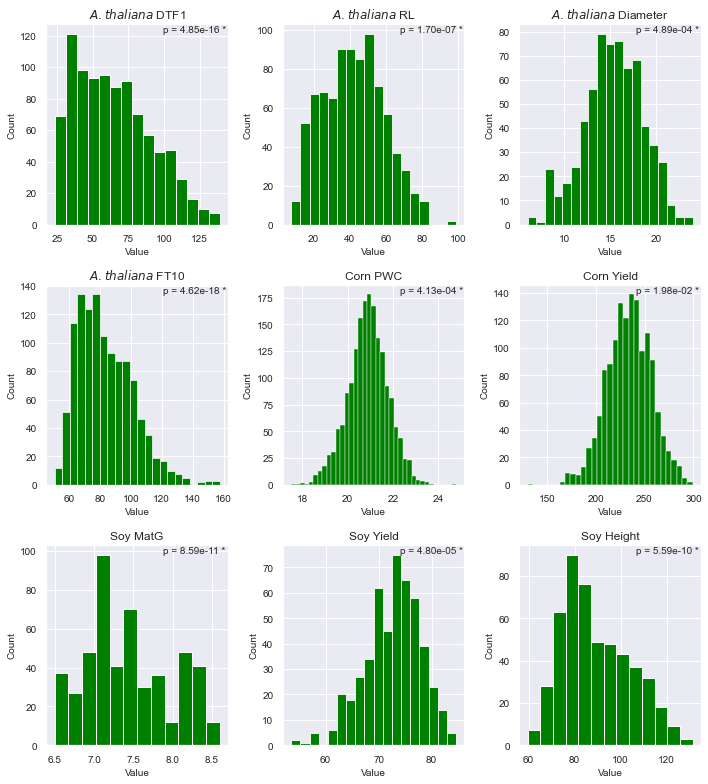

In [32]:
cm=1
titles = [
    '$\it{A. thaliana}$' + ' DTF1',
    '$\it{A. thaliana}$' + ' RL', 
    '$\it{A. thaliana}$' + ' Diameter', 
    '$\it{A. thaliana}$' + ' FT10',
]
data = [Ara_38, Ara_38, Ara_38, Ara_12]
pheno = ['DTF1', 'RL', 'Diameter', 'FT10']

fig = plt.figure(figsize=(10*cm, 11*cm))

for i in range(len(data)):
        shapiro_test = stats.shapiro(data[i][pheno[i]].dropna())
        p = shapiro_test.pvalue
        ax = fig.add_subplot(1, 4, i+1)
        sns.histplot(data = data[i],x = pheno[i], ax=ax ,color = 'green',alpha = 1)
        ax.set_xlabel('Value', fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.set_title(titles[i], fontsize=12)
        ax.tick_params(labelsize=10)
        if p < 0.05:
            text = 'p = ' + str("{:.2e}".format(p)) + ' *'
        else:
            text = 'p = ' + str("{:.2e}".format(p))
        ax.text(0.645, 0.96,s=text, fontsize=10, transform=ax.transAxes)
plt.subplots_adjust(hspace=0.1)
#fig.suptitle('Distribution of phenotypes', fontsize=13)
fig.tight_layout()
plt.savefig('histogram.svg', bbox_inches='tight', dpi=300)
plt.savefig('histogram.jpg', bbox_inches='tight', dpi=300)
plt.savefig('histogram.pdf', bbox_inches='tight', dpi=300)
plt.show()